In [1]:
import pandas as pd

In [2]:
test = pd.read_csv("../Documents/DataScience/data/energy/test.csv")
test.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75


In [3]:
train = pd.read_csv("../Documents/DataScience/data/energy/train.csv")
train.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [4]:
building = pd.read_csv("../Documents/DataScience/data/energy/building_info.csv")
building.head(3)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.0,-,-,-
1,2,건물기타,122233.47,99000.0,-,-,-
2,3,건물기타,171243.00,113950.0,40,-,-


In [5]:
submission = pd.read_csv("../Documents/DataScience/data/energy/sample_submission.csv")
submission.head(3)

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0


In [6]:
from datetime import datetime

date_format = "%Y%m%d %H"

# 날짜 컬럼을 반복하면서 요일 확인
train['요일'] = train['일시'].apply(lambda x: datetime.strptime(x, date_format).strftime("%a"))
test['요일'] = test['일시'].apply(lambda x: datetime.strptime(x, date_format).strftime("%a"))

train['강수량(mm)'].fillna(0, inplace=True)
train['풍속(m/s)'].fillna(method='ffill', inplace=True)
train['습도(%)'].fillna(method='ffill', inplace=True)
train['일조(hr)'].fillna(0, inplace=True)
train['일사(MJ/m2)'].fillna(0, inplace=True)
test['강수량(mm)'].fillna(0, inplace=True)
test['일조(hr)'] = 0
test['일사(MJ/m2)'] = 0

train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d %H')
test['일시'] = pd.to_datetime(test['일시'], format='%Y%m%d %H')
train['연'] = train['일시'].dt.year
train['월'] = train['일시'].dt.month
train['일'] = train['일시'].dt.day
train['시간'] = train['일시'].dt.hour
test['연'] = test['일시'].dt.year
test['월'] = test['일시'].dt.month
test['일'] = test['일시'].dt.day
test['시간'] = test['일시'].dt.hour

In [7]:
train.drop(columns=['num_date_time'], inplace=True)
test.drop(columns=['num_date_time'], inplace=True)

In [8]:
test

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),요일,일조(hr),일사(MJ/m2),연,월,일,시간
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72,Thu,0,0,2022,8,25,0
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72,Thu,0,0,2022,8,25,1
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75,Thu,0,0,2022,8,25,2
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78,Thu,0,0,2022,8,25,3
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77,Thu,0,0,2022,8,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,2022-08-31 19:00:00,22.5,0.0,0.9,84,Wed,0,0,2022,8,31,19
16796,100,2022-08-31 20:00:00,20.7,0.0,0.4,95,Wed,0,0,2022,8,31,20
16797,100,2022-08-31 21:00:00,20.2,0.0,0.4,98,Wed,0,0,2022,8,31,21
16798,100,2022-08-31 22:00:00,20.1,0.0,1.1,97,Wed,0,0,2022,8,31,22


In [9]:
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),요일,연,월,일,시간
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,Wed,2022,6,1,0
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,Wed,2022,6,1,1
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88,Wed,2022,6,1,2
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76,Wed,2022,6,1,3
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40,Wed,2022,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04,Wed,2022,8,24,19
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96,Wed,2022,8,24,20
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12,Wed,2022,8,24,21
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08,Wed,2022,8,24,22


In [10]:
building[building['태양광용량(kW)']!='-']

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
2,3,건물기타,171243.000,113950.00,40,-,-
3,4,건물기타,74312.980,34419.62,60,-,-
10,11,건물기타,45956.560,13190.98,447.2,-,-
11,12,건물기타,70163.100,3598.21,130.6,-,-
13,14,건물기타,16844.160,14102.92,56,-,-
15,16,공공,240038.000,95175.00,20,-,-
17,18,공공,75624.560,39915.10,64.8,-,-
20,21,공공,61469.670,43970.64,70,837.1,500
21,22,공공,61375.470,19800.00,110,-,-
23,24,대학교,659696.910,516097.85,97.65,-,-


In [11]:
merge_train = train.merge(building,on='건물번호')
merge_train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),요일,연,월,일,시간,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,Wed,2022,6,1,0,건물기타,110634.00,39570.00,-,-,-
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,Wed,2022,6,1,1,건물기타,110634.00,39570.00,-,-,-
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88,Wed,2022,6,1,2,건물기타,110634.00,39570.00,-,-,-
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76,Wed,2022,6,1,3,건물기타,110634.00,39570.00,-,-,-
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40,Wed,2022,6,1,4,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04,Wed,2022,8,24,19,호텔및리조트,57497.84,40035.23,-,-,-
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96,Wed,2022,8,24,20,호텔및리조트,57497.84,40035.23,-,-,-
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12,Wed,2022,8,24,21,호텔및리조트,57497.84,40035.23,-,-,-
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08,Wed,2022,8,24,22,호텔및리조트,57497.84,40035.23,-,-,-


In [12]:
merge_test = test.merge(building,on='건물번호')
merge_test

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),요일,일조(hr),일사(MJ/m2),연,월,일,시간,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72,Thu,0,0,2022,8,25,0,건물기타,110634.00,39570.00,-,-,-
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72,Thu,0,0,2022,8,25,1,건물기타,110634.00,39570.00,-,-,-
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75,Thu,0,0,2022,8,25,2,건물기타,110634.00,39570.00,-,-,-
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78,Thu,0,0,2022,8,25,3,건물기타,110634.00,39570.00,-,-,-
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77,Thu,0,0,2022,8,25,4,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,2022-08-31 19:00:00,22.5,0.0,0.9,84,Wed,0,0,2022,8,31,19,호텔및리조트,57497.84,40035.23,-,-,-
16796,100,2022-08-31 20:00:00,20.7,0.0,0.4,95,Wed,0,0,2022,8,31,20,호텔및리조트,57497.84,40035.23,-,-,-
16797,100,2022-08-31 21:00:00,20.2,0.0,0.4,98,Wed,0,0,2022,8,31,21,호텔및리조트,57497.84,40035.23,-,-,-
16798,100,2022-08-31 22:00:00,20.1,0.0,1.1,97,Wed,0,0,2022,8,31,22,호텔및리조트,57497.84,40035.23,-,-,-


In [13]:
for col in merge_train.columns:
    merge_train[col] = merge_train[col].replace('-',0)
    merge_train[col] = merge_train[col].fillna(0)
    
merge_train['태양광용량(kW)'] = merge_train['태양광용량(kW)'].astype('float64')
merge_train['ESS저장용량(kWh)'] = merge_train['ESS저장용량(kWh)'].astype('float64')
merge_train['PCS용량(kW)'] = merge_train['PCS용량(kW)'].astype('float64')

In [14]:
for col in merge_test.columns:
    merge_test[col] = merge_test[col].replace('-',0)
    merge_test[col] = merge_test[col].fillna(0)
    
merge_test['태양광용량(kW)'] = merge_test['태양광용량(kW)'].astype('float64')
merge_test['ESS저장용량(kWh)'] = merge_test['ESS저장용량(kWh)'].astype('float64')
merge_test['PCS용량(kW)'] = merge_test['PCS용량(kW)'].astype('float64')

In [15]:
merge_train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),요일,연,월,일,시간,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,Wed,2022,6,1,0,건물기타,110634.00,39570.00,0.0,0.0,0.0
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,Wed,2022,6,1,1,건물기타,110634.00,39570.00,0.0,0.0,0.0
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88,Wed,2022,6,1,2,건물기타,110634.00,39570.00,0.0,0.0,0.0
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76,Wed,2022,6,1,3,건물기타,110634.00,39570.00,0.0,0.0,0.0
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40,Wed,2022,6,1,4,건물기타,110634.00,39570.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04,Wed,2022,8,24,19,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96,Wed,2022,8,24,20,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12,Wed,2022,8,24,21,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08,Wed,2022,8,24,22,호텔및리조트,57497.84,40035.23,0.0,0.0,0.0


In [16]:
merge_train[(merge_train['일조(hr)']!=0.0) & (merge_train['일사(MJ/m2)']!=0.0)]

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),요일,연,월,일,시간,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
7,1,2022-06-01 07:00:00,17.4,0.0,1.3,50.0,1.0,0.55,1684.80,Wed,2022,6,1,7,건물기타,110634.00,39570.0,0.0,0.0,0.0
8,1,2022-06-01 08:00:00,20.6,0.0,1.8,44.0,1.0,1.29,1976.16,Wed,2022,6,1,8,건물기타,110634.00,39570.0,0.0,0.0,0.0
9,1,2022-06-01 09:00:00,23.2,0.0,1.7,41.0,1.0,2.01,2289.12,Wed,2022,6,1,9,건물기타,110634.00,39570.0,0.0,0.0,0.0
10,1,2022-06-01 10:00:00,24.8,0.0,2.5,35.0,1.0,2.58,2683.20,Wed,2022,6,1,10,건물기타,110634.00,39570.0,0.0,0.0,0.0
11,1,2022-06-01 11:00:00,26.3,0.0,2.7,31.0,1.0,3.19,2730.72,Wed,2022,6,1,11,건물기타,110634.00,39570.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197871,97,2022-08-24 15:00:00,30.4,0.0,3.9,61.0,1.0,2.90,1522.26,Wed,2022,8,24,15,호텔및리조트,55144.67,25880.0,0.0,0.0,0.0
197872,97,2022-08-24 16:00:00,30.0,0.0,3.8,59.0,1.0,2.43,1441.44,Wed,2022,8,24,16,호텔및리조트,55144.67,25880.0,0.0,0.0,0.0
197873,97,2022-08-24 17:00:00,29.7,0.0,3.4,58.0,1.0,1.76,1413.90,Wed,2022,8,24,17,호텔및리조트,55144.67,25880.0,0.0,0.0,0.0
197874,97,2022-08-24 18:00:00,28.0,0.0,2.6,61.0,0.7,0.62,1411.38,Wed,2022,8,24,18,호텔및리조트,55144.67,25880.0,0.0,0.0,0.0


In [17]:
train_corr = merge_train.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_8068\347703195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = merge_train.corr()


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 예시 데이터 생성 (실제 데이터로 대체 필요)
# Features: 온도, 습도, 바람 속도 등
# Target: 일조 및 일사량

# Features와 Target 나누기
X = merge_train[['기온(C)', '습도(%)', '풍속(m/s)']]
y_sunshine = merge_train['일조(hr)']
y_solar_radiation = merge_train['일사(MJ/m2)']

# Train-Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_sunshine, test_size=0.2, random_state=42)
# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0789382892488024


In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 모델 학습 (위에서 생성한 모델을 사용)
model = LinearRegression()
model.fit(X_train, y_train)  # 이전 코드에서 학습한 모델을 사용

# 새로운 데이터에 대한 예측 수행
new_sunshine_predictions = model.predict(X)

# 새로운 데이터프레임 생성
predictions_df = pd.DataFrame({'Temperature': merge_train['기온(C)'],
                               'Humidity': merge_train['습도(%)'],
                               'Wind_Speed': merge_train['풍속(m/s)'],
                               'Predicted_Sunshine': new_sunshine_predictions})

predictions_df


,Temperature,Humidity,Wind_Speed,Predicted_Sunshine
0,18.6,42.0,0.9,0.476555
1,18.0,45.0,1.1,0.430084
2,17.7,45.0,1.5,0.425031
3,16.7,48.0,1.4,0.368883
4,18.4,43.0,2.8,0.467531
...,...,...,...,...
203995,23.1,86.0,0.9,0.071207
203996,22.4,86.0,1.3,0.057535
203997,21.3,92.0,1.0,-0.035721
203998,21.0,94.0,0.3,-0.067486


In [64]:
X = merge_train[['기온(C)', '습도(%)', '풍속(m/s)']]
y_sunshine = merge_train['일조(hr)']
y_solar_radiation = merge_train['일사(MJ/m2)']

# Train-Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_solar_radiation, test_size=0.2, random_state=42)

# 모델 학습 (위에서 생성한 모델을 사용)
model = LinearRegression()
model.fit(X_train, y_train)  # 이전 코드에서 학습한 모델을 사용

# 새로운 데이터에 대한 예측 수행
new_sunshine_predictions = model.predict(X)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 새로운 데이터프레임 생성
predictions_df1 = pd.DataFrame({'Predicted_Solar_Radiation': new_sunshine_predictions})

predictions_df1

Mean Squared Error: 0.7958213620546324


,Predicted_Solar_Radiation
0,1.065142
1,0.953774
2,0.952260
3,0.800028
4,1.113480
...,...
203995,0.188762
203996,0.160368
203997,-0.088278
203998,-0.194649


In [65]:
combined_df = pd.concat([predictions_df, predictions_df1], axis=1)
combined_df

,Temperature,Humidity,Wind_Speed,Predicted_Sunshine,Predicted_Solar_Radiation
0,18.6,42.0,0.9,0.476555,1.065142
1,18.0,45.0,1.1,0.430084,0.953774
2,17.7,45.0,1.5,0.425031,0.952260
3,16.7,48.0,1.4,0.368883,0.800028
4,18.4,43.0,2.8,0.467531,1.113480
...,...,...,...,...,...
203995,23.1,86.0,0.9,0.071207,0.188762
203996,22.4,86.0,1.3,0.057535,0.160368
203997,21.3,92.0,1.0,-0.035721,-0.088278
203998,21.0,94.0,0.3,-0.067486,-0.194649


In [66]:
combined_df[combined_df['Predicted_Sunshine']<=0]

,Temperature,Humidity,Wind_Speed,Predicted_Sunshine,Predicted_Solar_Radiation
48,18.9,85.0,2.1,-0.003641,-0.010748
49,19.0,86.0,2.6,-0.011139,-0.007511
125,18.5,88.0,2.1,-0.046508,-0.117999
126,18.2,89.0,1.8,-0.065446,-0.178933
127,17.9,89.0,1.9,-0.071558,-0.194432
...,...,...,...,...,...
203982,22.1,95.0,1.9,-0.049557,-0.072936
203983,22.2,95.0,1.3,-0.049519,-0.094185
203997,21.3,92.0,1.0,-0.035721,-0.088278
203998,21.0,94.0,0.3,-0.067486,-0.194649


### 결론 : 일조 일사 예측은 보류

In [72]:
target = ['전력소비량(kWh)']
f_col = ['일시', '기온(C)', '풍속(m/s)', '습도(%)']
train_x, test_x, train_y, test_y = train_test_split(
                                                    merge_train[f_col], 
                                                    merge_train[target], 
                                                    test_size=0.3,
                                                    shuffle=False,
                                                    )
train_x.head()

,일시,기온(C),풍속(m/s),습도(%)
0,2022-06-01 00:00:00,18.6,0.9,42.0
1,2022-06-01 01:00:00,18.0,1.1,45.0
2,2022-06-01 02:00:00,17.7,1.5,45.0
3,2022-06-01 03:00:00,16.7,1.4,48.0
4,2022-06-01 04:00:00,18.4,2.8,43.0


In [83]:
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
                          index = train_x.index, 
                          constant = True,  
                          order = 2, 
                          drop = True,      
                          )

X = dp.in_sample()
lm = LinearRegression(fit_intercept=False)
lm.fit(X, train_y)

test_const = [1 for i in range(test_x.shape[0])]
test_trend = np.arange(X['trend'].max(), X['trend'].max()+test_x.shape[0])
test_trend_squared = [i**2 for i in test_trend]
X_ = pd.DataFrame([test_const, test_trend, test_trend_squared]).T
X_.columns = ['const', 'trend', 'trend_squared']
X_.index = test_x.index

trend_train = lm.predict(X)
trend_test = lm.predict(X_)

trend_train
trend_test

array([[ 1148.70122341],
       [ 1148.63792208],
       [ 1148.57461989],
       ...,
       [-4330.98282417],
       [-4331.09860712],
       [-4331.21439093]])

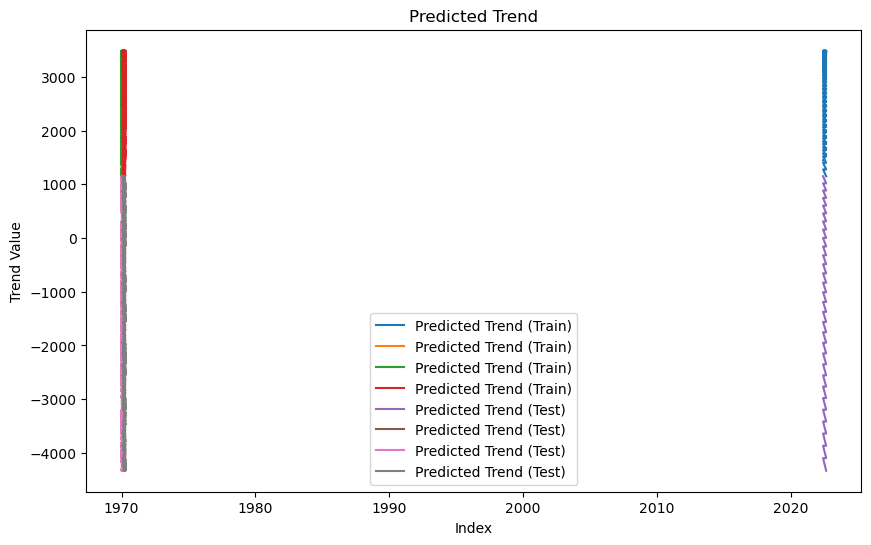

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

# DeterministicProcess와 LinearRegression을 이용한 추세 예측
dp = DeterministicProcess(index=train_x.index, constant=True, order=2, drop=True)
X = dp.in_sample()
lm = LinearRegression(fit_intercept=False)
lm.fit(X, train_y)

test_const = [1 for _ in range(test_x.shape[0])]
test_trend = np.arange(X['trend'].max(), X['trend'].max() + test_x.shape[0])
test_trend_squared = [i ** 2 for i in test_trend]
X_ = pd.DataFrame([test_const, test_trend, test_trend_squared]).T
X_.columns = ['const', 'trend', 'trend_squared']
X_.index = test_x.index

trend_train = lm.predict(X)
trend_test = lm.predict(X_)

# 그래프로 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_x, trend_train, label='Predicted Trend (Train)')
plt.plot(test_x, trend_test, label='Predicted Trend (Test)')
plt.xlabel('Index')
plt.ylabel('Trend Value')
plt.title('Predicted Trend')
plt.legend()
plt.show()

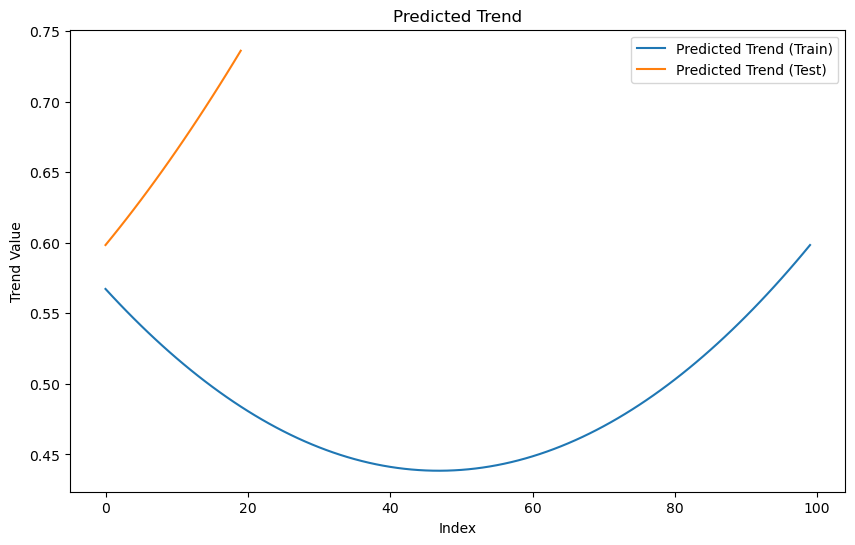

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

# 예시 데이터 생성 (임의로 생성)
train_x = pd.DataFrame({'index': range(100)})
train_y = np.random.rand(100)
test_x = pd.DataFrame({'index': range(100, 120)})

# DeterministicProcess와 LinearRegression을 이용한 추세 예측
dp = DeterministicProcess(index=train_x.index, constant=True, order=2, drop=True)
X = dp.in_sample()
lm = LinearRegression(fit_intercept=False)
lm.fit(X, train_y)

test_const = [1 for _ in range(test_x.shape[0])]
test_trend = np.arange(X['trend'].max(), X['trend'].max() + test_x.shape[0])
test_trend_squared = [i ** 2 for i in test_trend]
X_ = pd.DataFrame([test_const, test_trend, test_trend_squared]).T
X_.columns = ['const', 'trend', 'trend_squared']
X_.index = test_x.index

trend_train = lm.predict(X)
trend_test = lm.predict(X_)

# 그래프로 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_x.index, trend_train, label='Predicted Trend (Train)')
plt.plot(test_x.index, trend_test, label='Predicted Trend (Test)')
plt.xlabel('Index')
plt.ylabel('Trend Value')
plt.title('Predicted Trend')
plt.legend()
plt.show()